In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel,SelectKBest,chi2
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import joblib
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***

In [2]:
#load dataset
df=pd.read_csv('/content/colorectal_cancer_prediction.csv')

In [3]:
df.head()

,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
0,1,71,Male,Other,Europe,Urban,Middle,Yes,No,III,...,Yes,Delayed,Good,Yes,No,No,Good,Survived,No,16
1,2,34,Female,Black,North America,Urban,Middle,No,No,I,...,No,Timely,Good,No,Yes,Yes,Poor,Deceased,No,28
2,3,80,Female,White,North America,Urban,Middle,No,No,III,...,Yes,Timely,Limited,No,Yes,Yes,Good,Survived,No,26
3,4,40,Male,Black,North America,Rural,Low,No,No,I,...,Yes,Delayed,Limited,Yes,No,Yes,Poor,Deceased,No,44
4,5,43,Female,White,Europe,Urban,High,Yes,No,III,...,No,Delayed,Good,Yes,No,Yes,Poor,Deceased,Yes,20


In [4]:
#shape of dataset
df.shape

(89945, 30)

#***EDA(Explotary Data Analysis):-***

In [5]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               89945 non-null  int64  
 1   Age                      89945 non-null  int64  
 2   Gender                   89945 non-null  object 
 3   Race                     89945 non-null  object 
 4   Region                   89945 non-null  object 
 5   Urban_or_Rural           89945 non-null  object 
 6   Socioeconomic_Status     89945 non-null  object 
 7   Family_History           89945 non-null  object 
 8   Previous_Cancer_History  89945 non-null  object 
 9   Stage_at_Diagnosis       89945 non-null  object 
 10  Tumor_Aggressiveness     89945 non-null  object 
 11  Colonoscopy_Access       89945 non-null  object 
 12  Screening_Regularity     89945 non-null  object 
 13  Diet_Type                89945 non-null  object 
 14  BMI                   

In [6]:
#drop unncessary column
df.drop(columns=['Patient_ID'],axis=1,inplace=True)

In [7]:
#dataset describe
df.describe()

,Age,BMI,Time_to_Recurrence
count,89945.000000,89945.000000,89945.000000
mean,54.332892,29.268105,29.543299
std,20.182220,6.211668,17.268440
min,20.000000,18.500000,0.000000
25%,37.000000,23.900000,15.000000
50%,54.000000,29.300000,30.000000
75%,72.000000,34.600000,44.000000
max,89.000000,40.000000,59.000000


In [8]:
#check the missing values
df.isnull().sum()

,0
Age,0
Gender,0
Race,0
Region,0
Urban_or_Rural,0
Socioeconomic_Status,0
Family_History,0
Previous_Cancer_History,0
Stage_at_Diagnosis,0
Tumor_Aggressiveness,0


In [9]:
#check the duplicated rows
df.duplicated().sum()

0

In [10]:
#target column values count
df['Survival_Status'].value_counts()

,count
Survival_Status,
Survived,67341
Deceased,22604


In [11]:
#rename the values in target column deceased to Dead
df['Survival_Status']=df['Survival_Status'].replace('Deceased','Dead')

In [12]:
#categorical column list
cate_col=df.select_dtypes(include='object').columns
cate_col

Index(['Gender', 'Race', 'Region', 'Urban_or_Rural', 'Socioeconomic_Status',
       'Family_History', 'Previous_Cancer_History', 'Stage_at_Diagnosis',
       'Tumor_Aggressiveness', 'Colonoscopy_Access', 'Screening_Regularity',
       'Diet_Type', 'Physical_Activity_Level', 'Smoking_Status',
       'Alcohol_Consumption', 'Red_Meat_Consumption', 'Fiber_Consumption',
       'Insurance_Coverage', 'Time_to_Diagnosis', 'Treatment_Access',
       'Chemotherapy_Received', 'Radiotherapy_Received', 'Surgery_Received',
       'Follow_Up_Adherence', 'Survival_Status', 'Recurrence'],
      dtype='object')

In [13]:
#numerical column
num_col=df.select_dtypes(exclude='object').columns
num_col

Index(['Age', 'BMI', 'Time_to_Recurrence'], dtype='object')

#***Data Visualization:-***

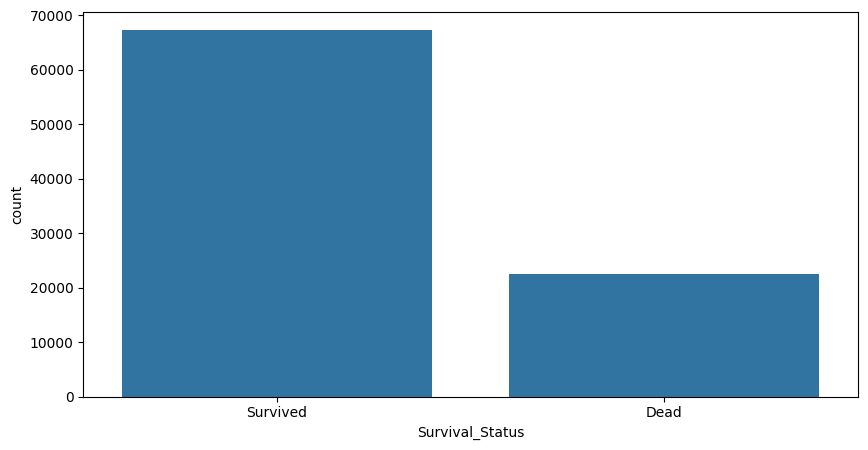

In [14]:
#check the trget column bar chart
plt.figure(figsize=(10,5))
sns.countplot(x=df['Survival_Status'])
plt.show()

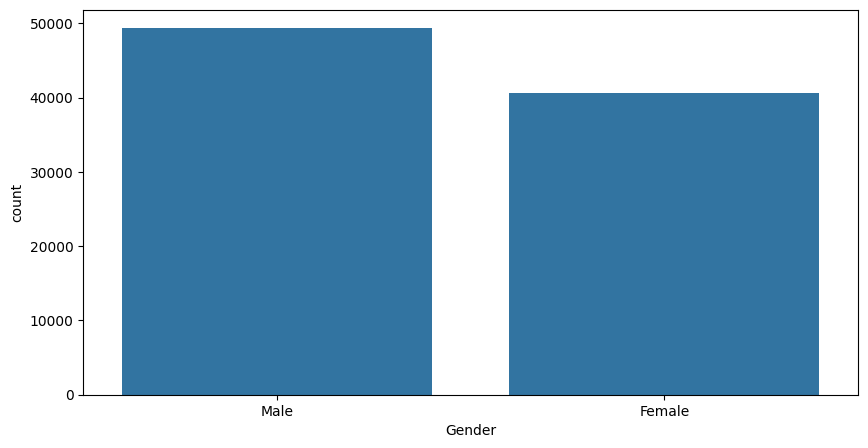

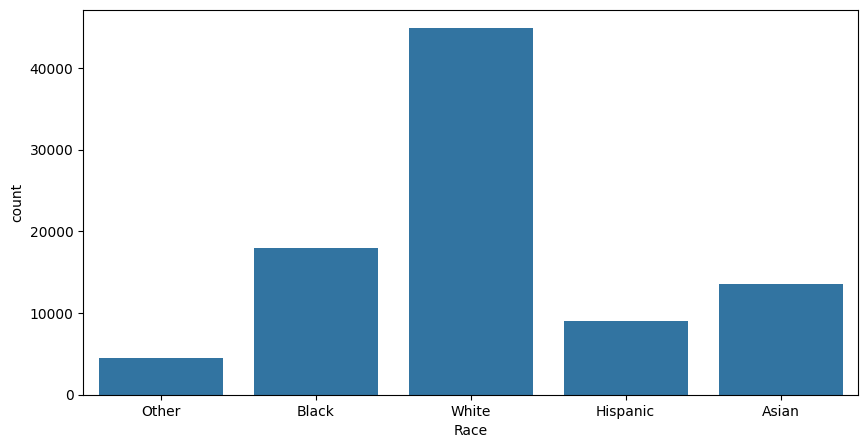

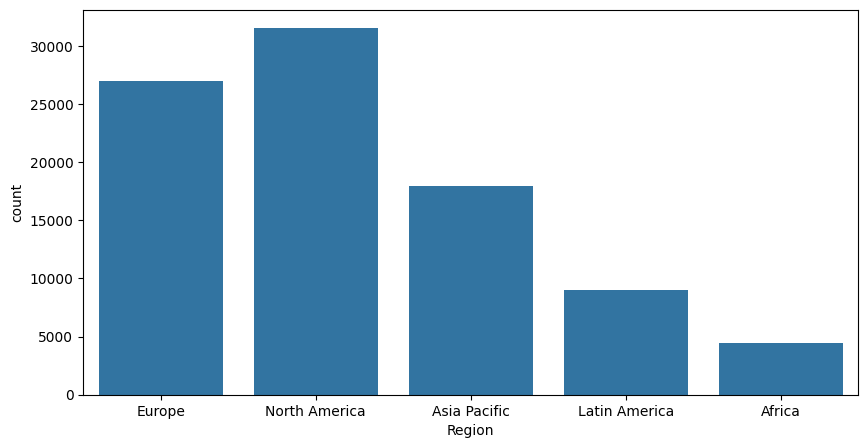

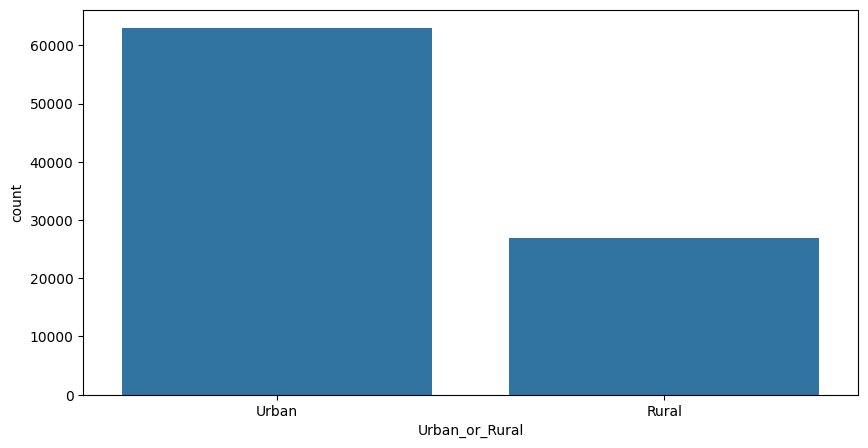

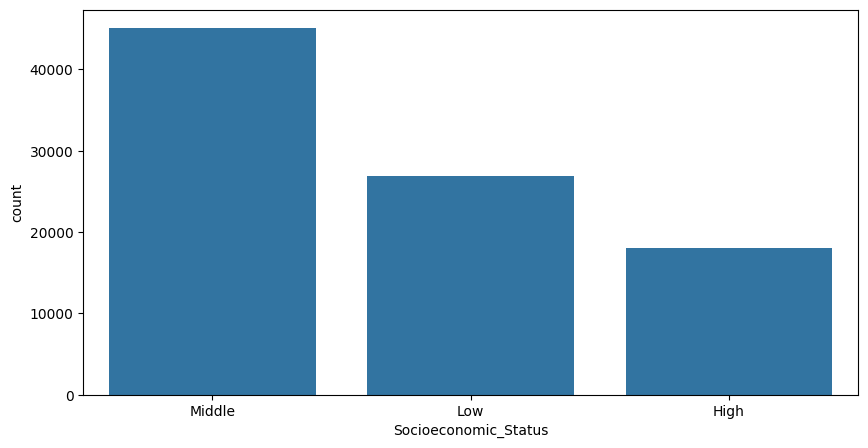

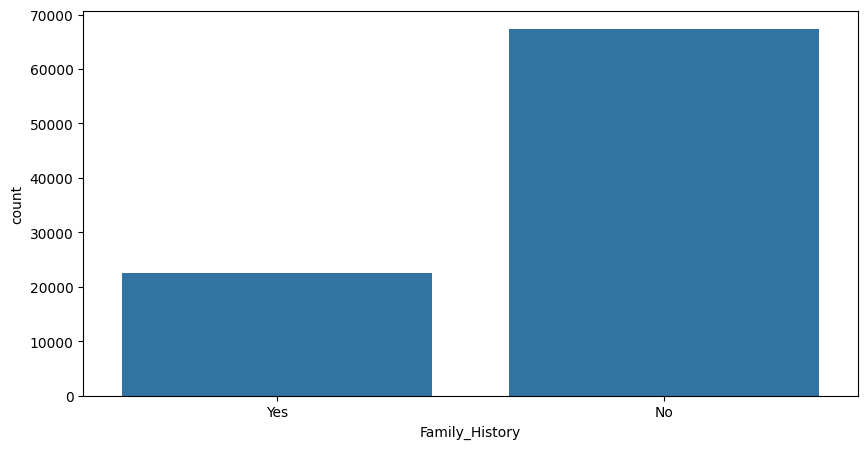

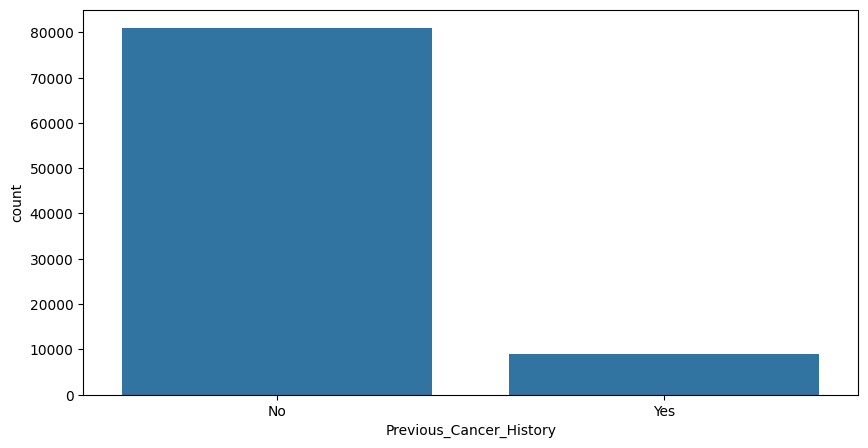

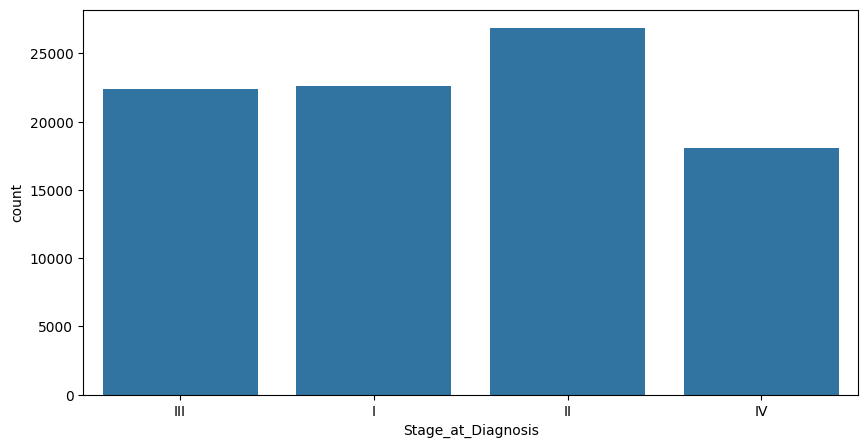

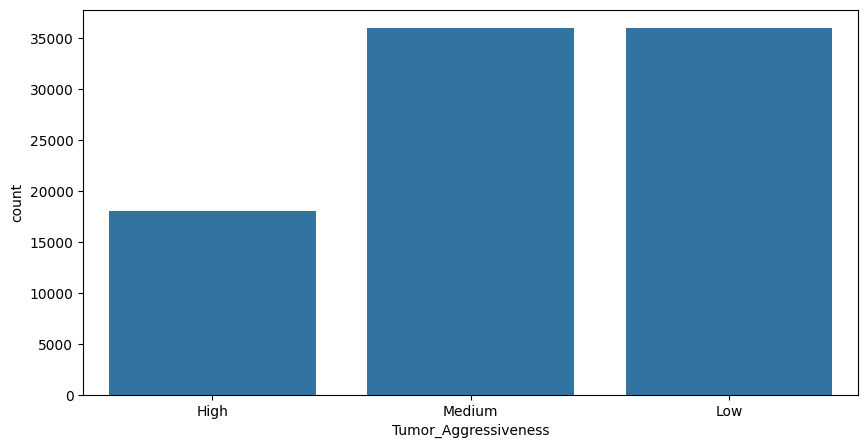

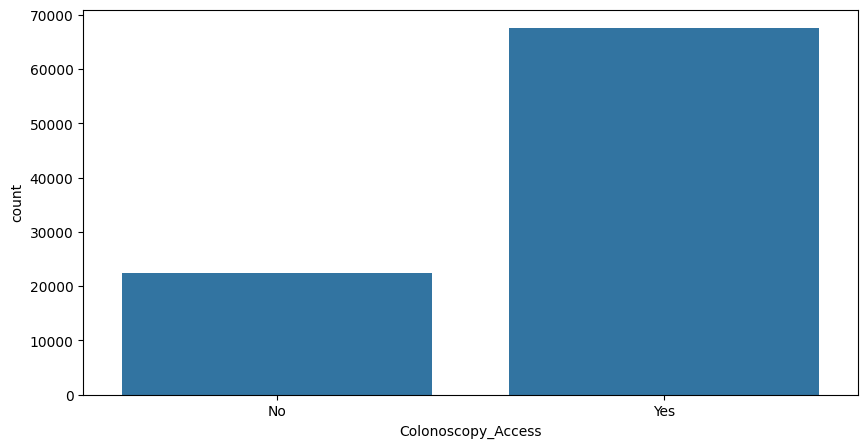

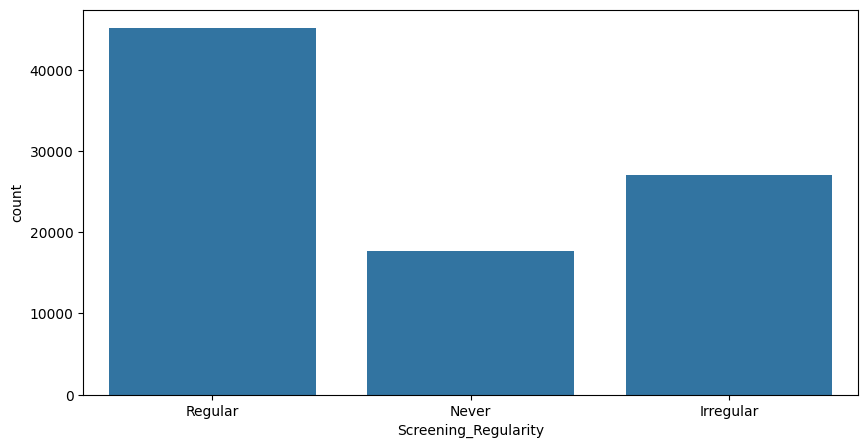

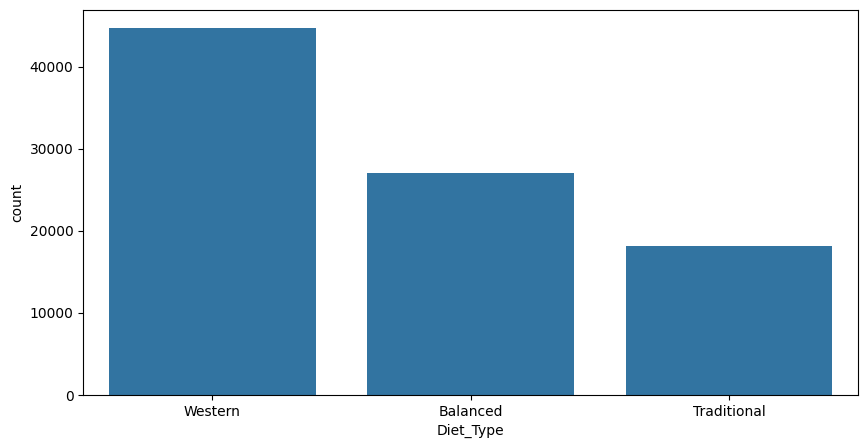

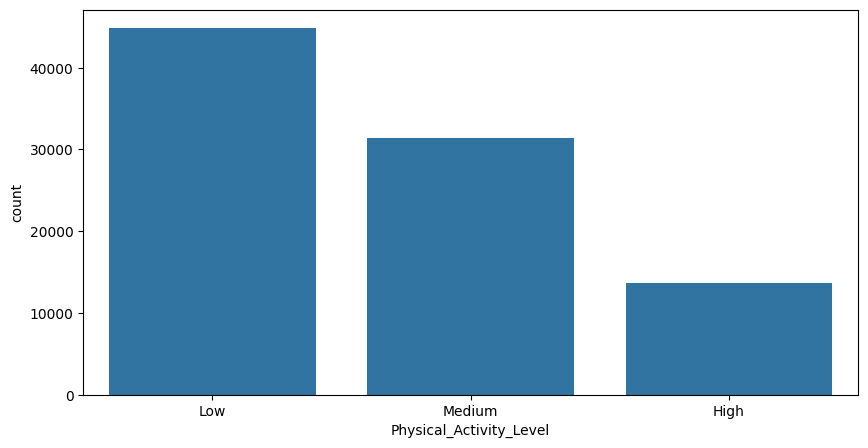

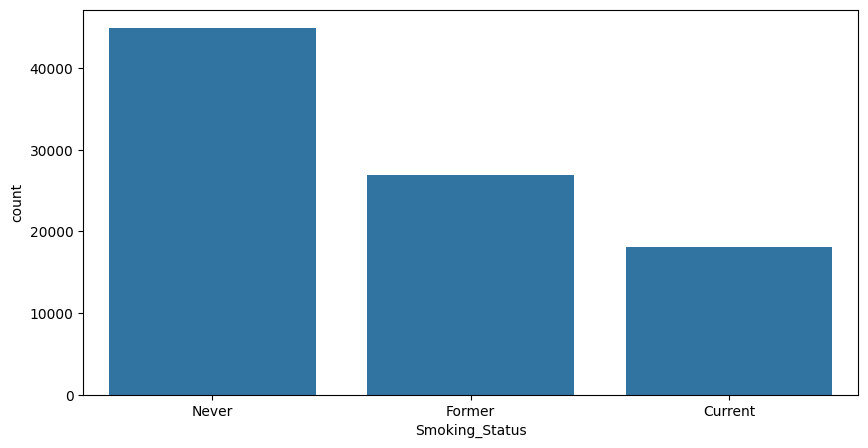

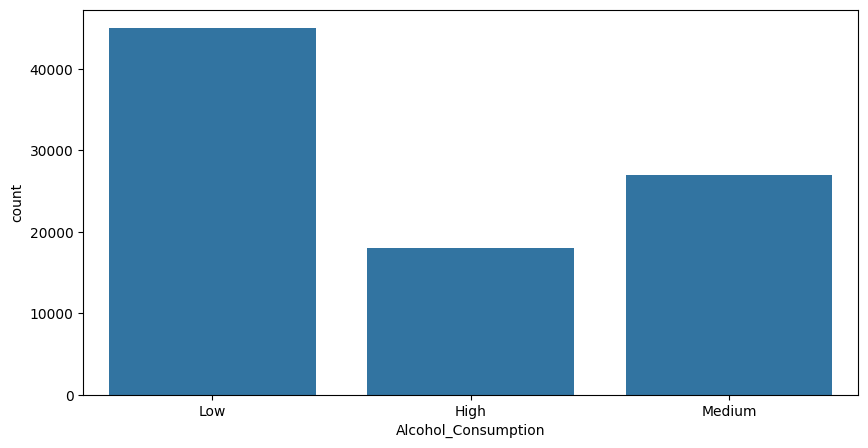

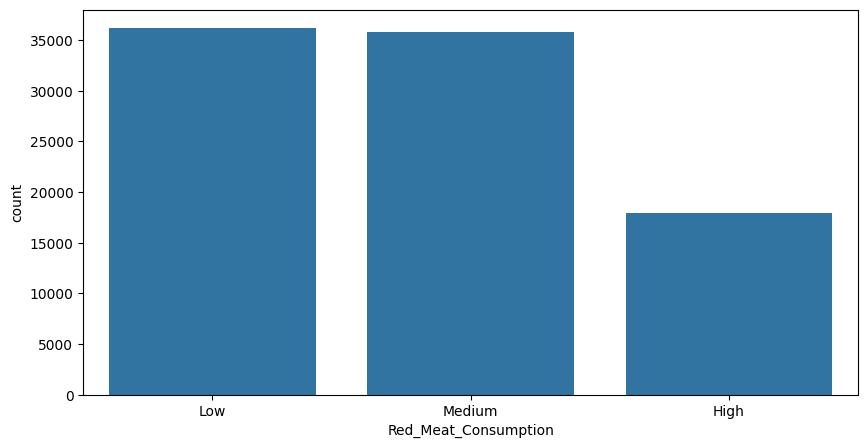

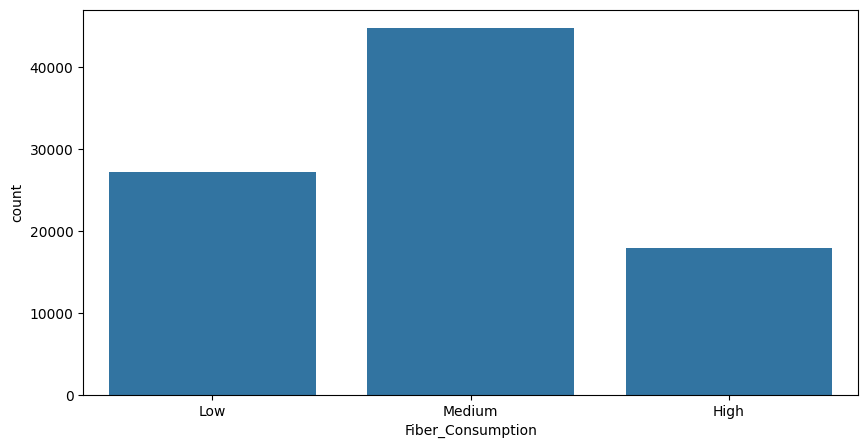

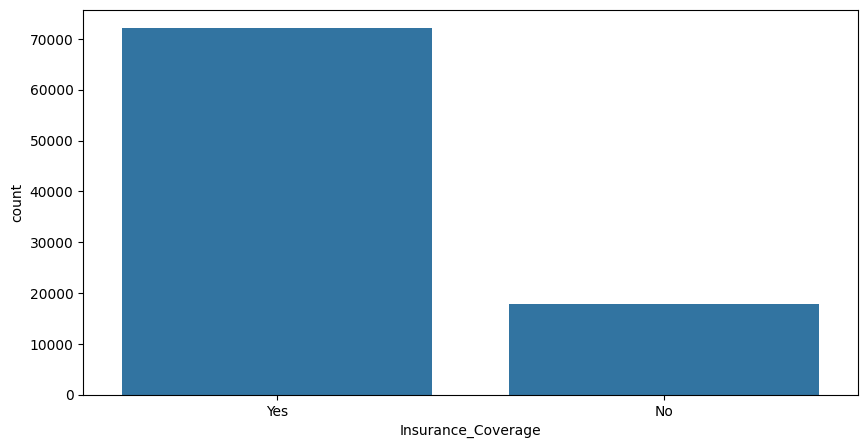

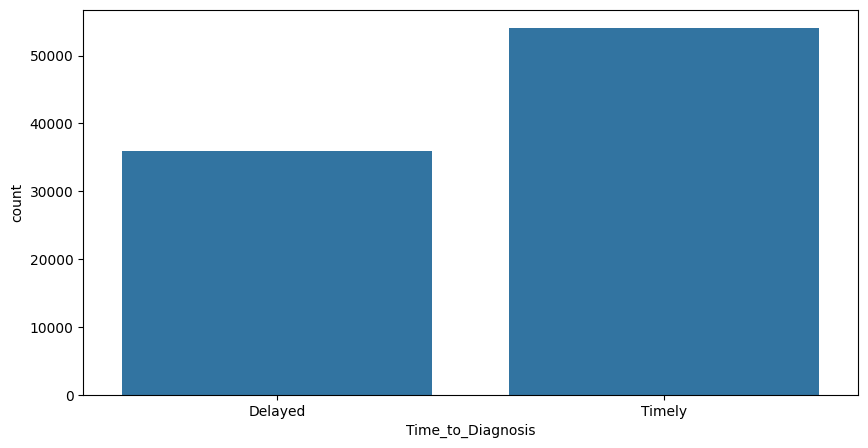

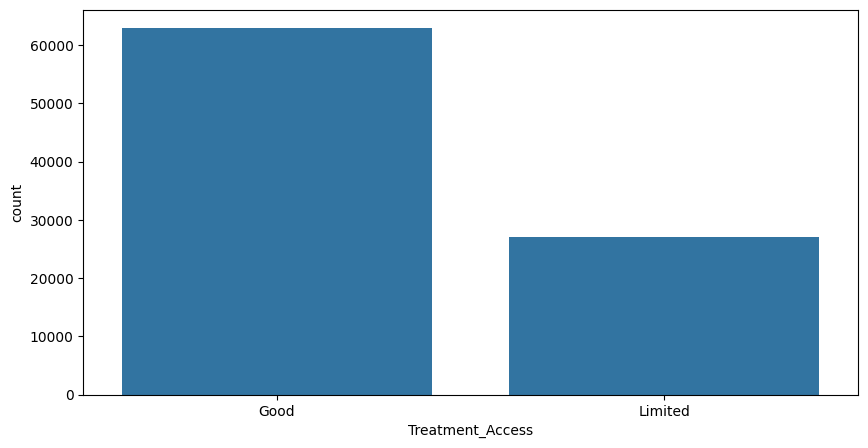

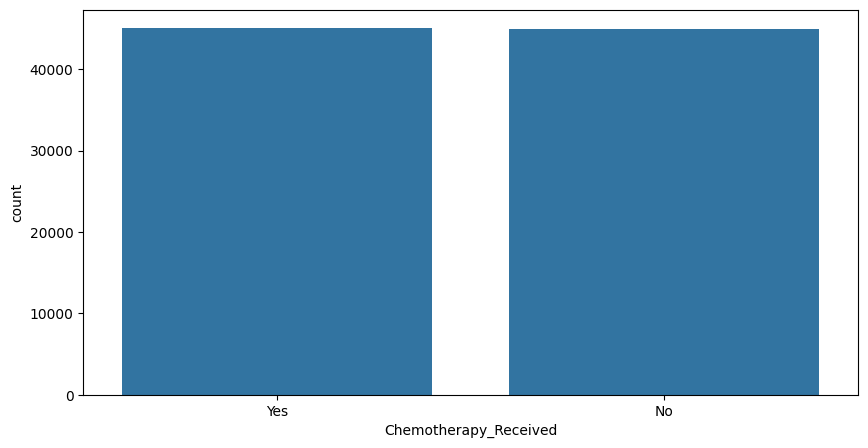

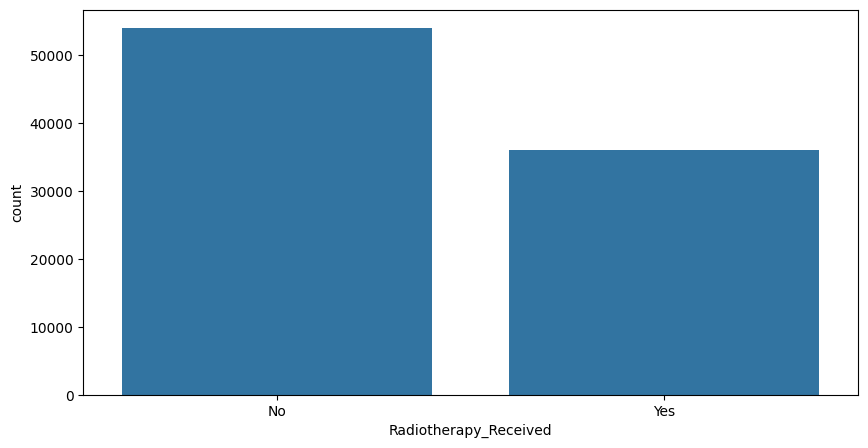

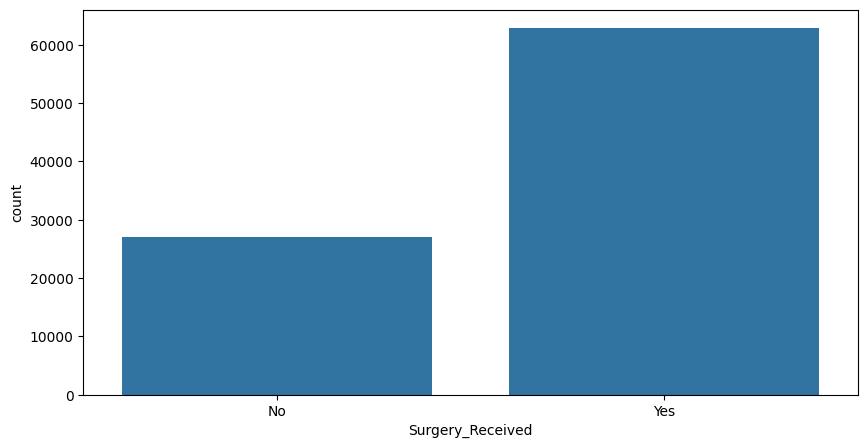

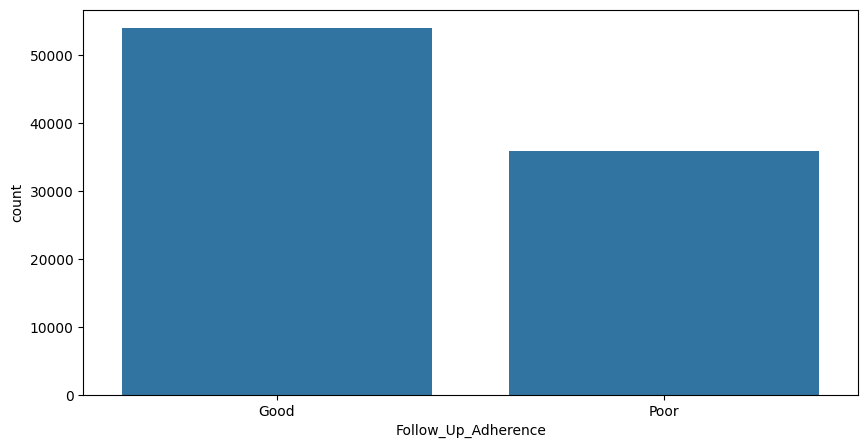

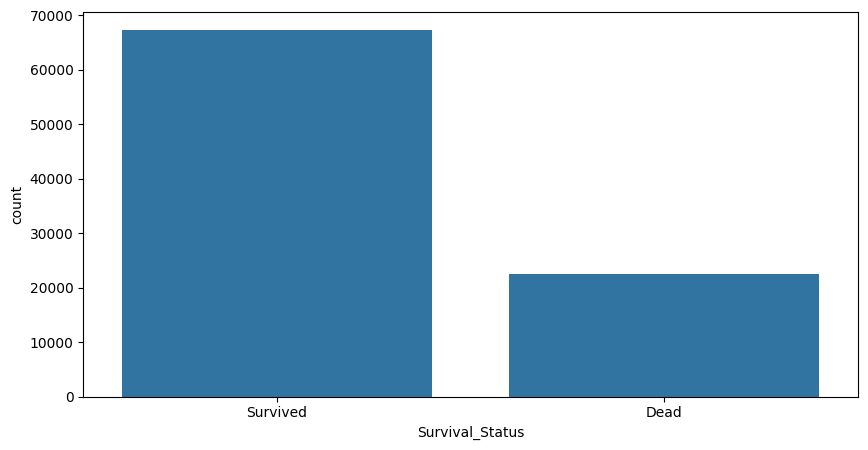

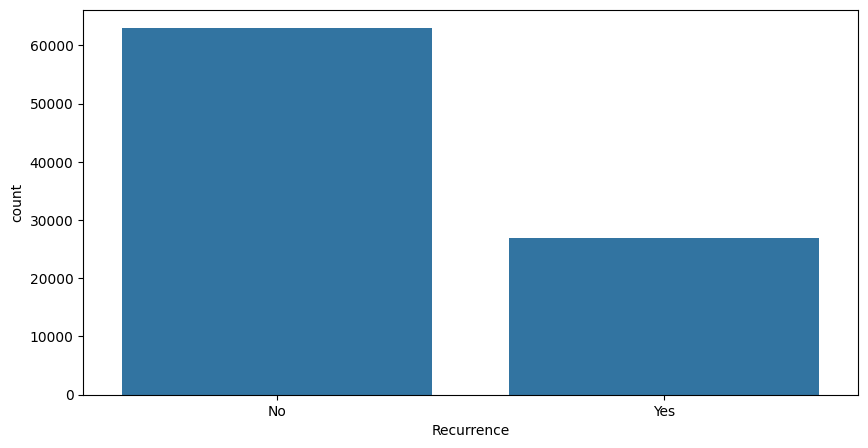

In [15]:
#visualize the categorical column
for col in cate_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x=df[col])
  plt.show()

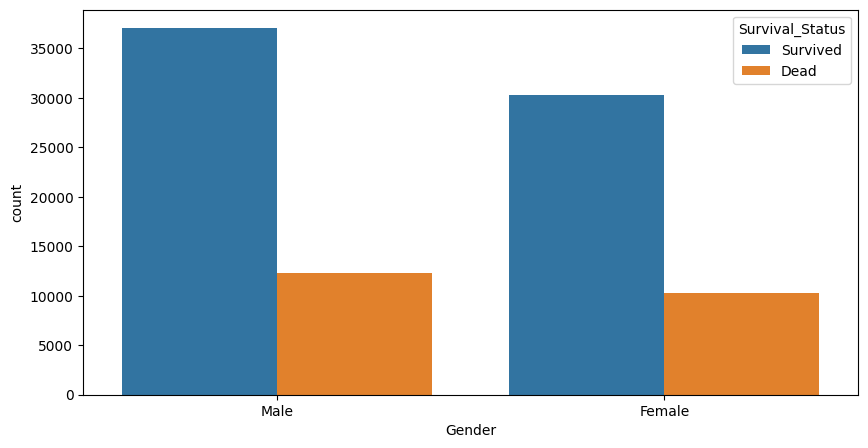

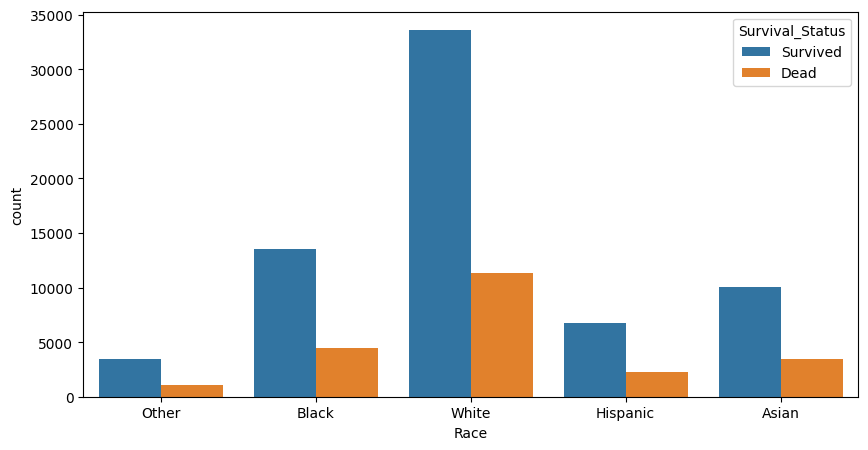

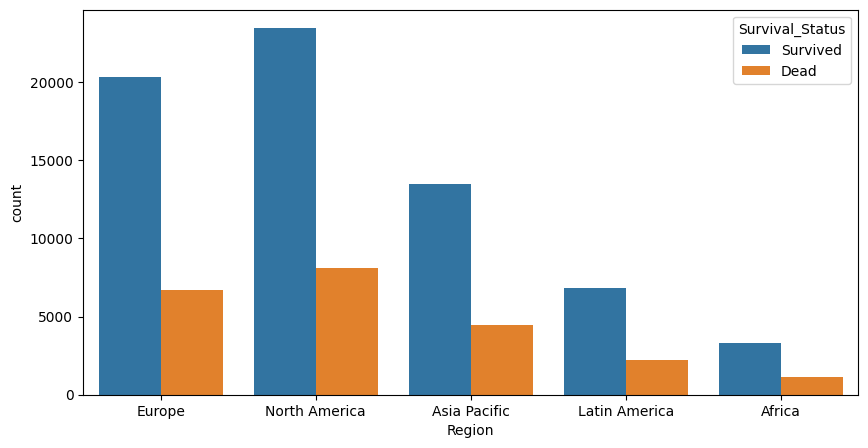

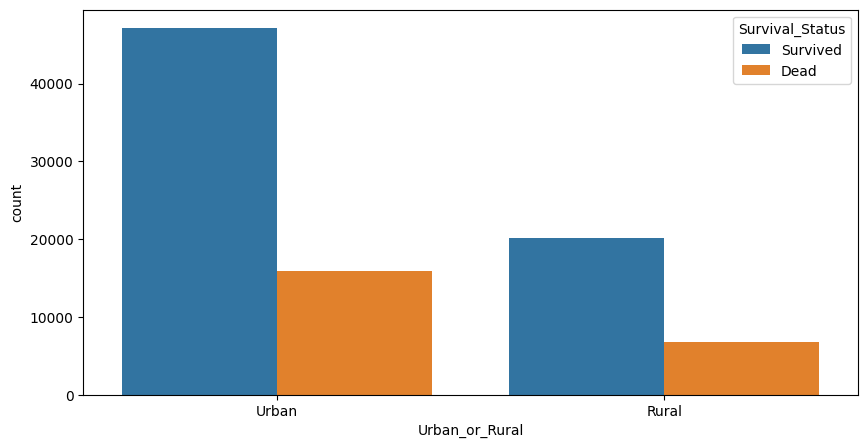

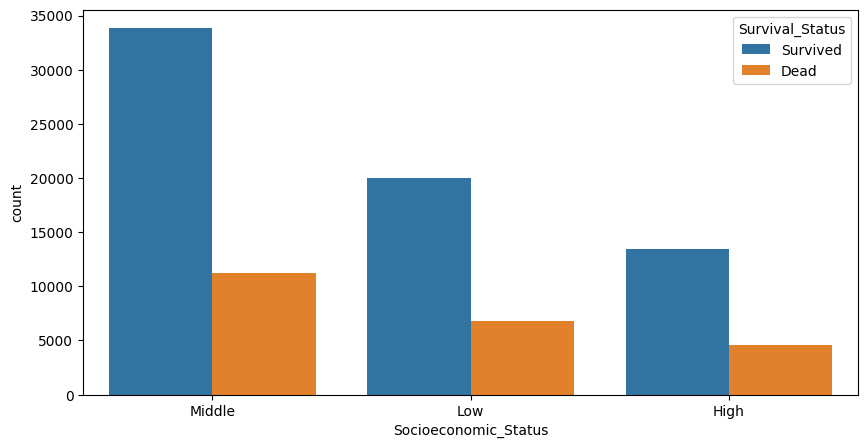

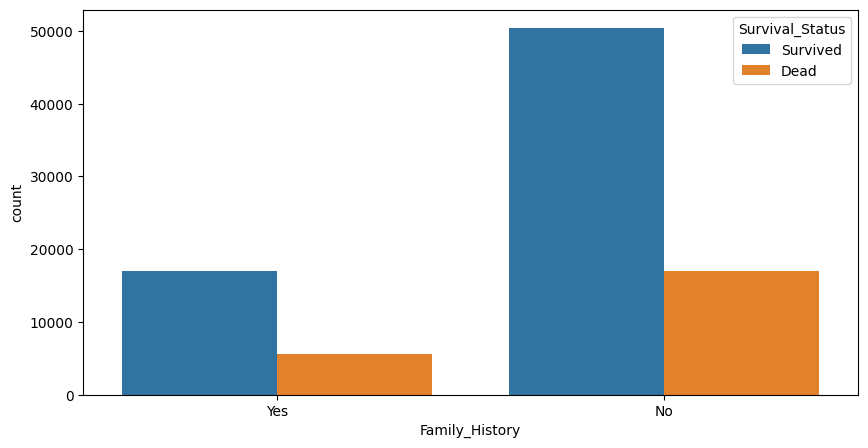

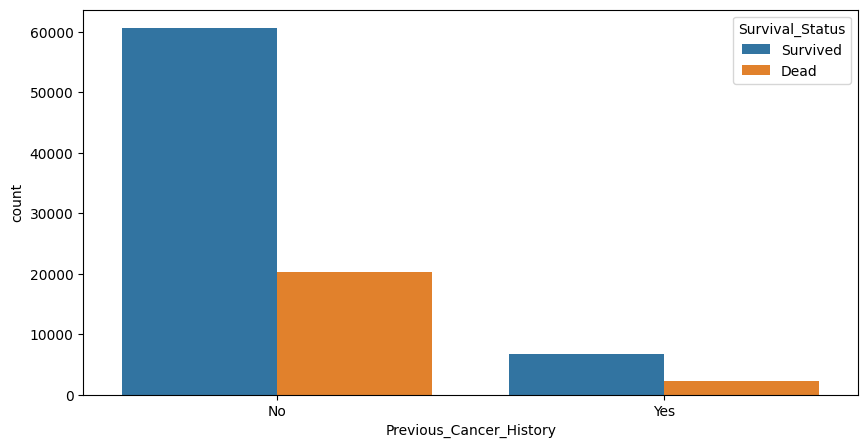

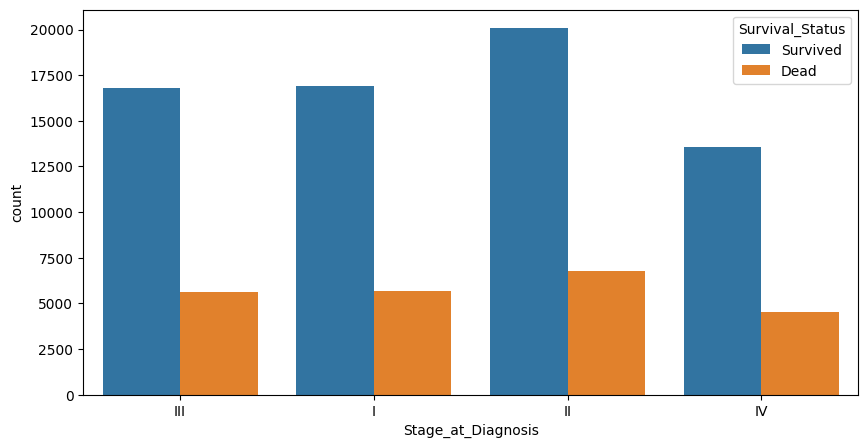

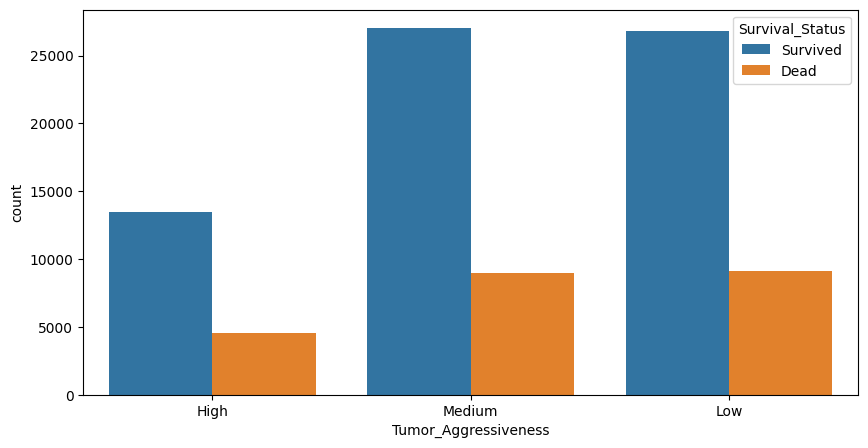

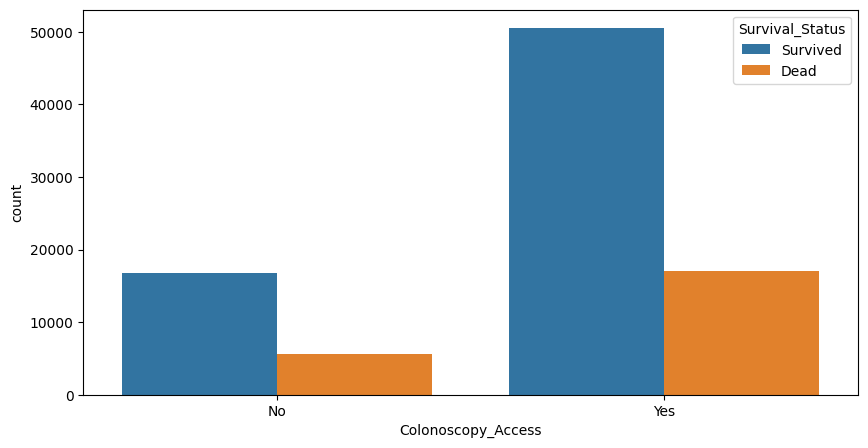

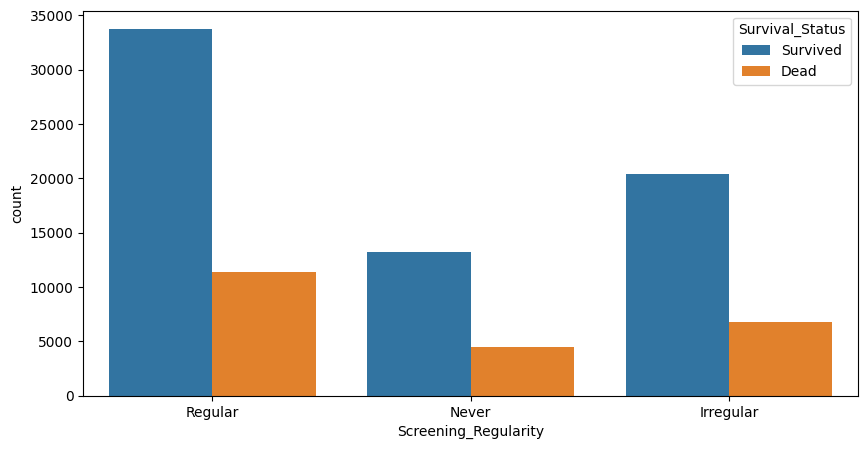

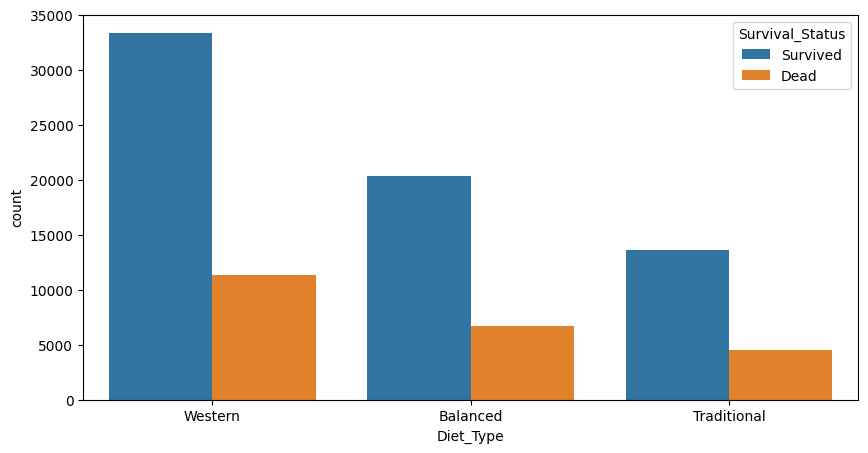

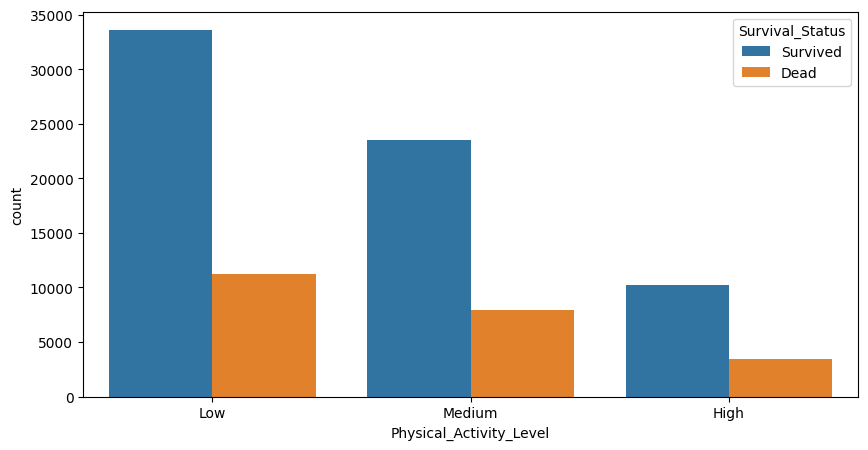

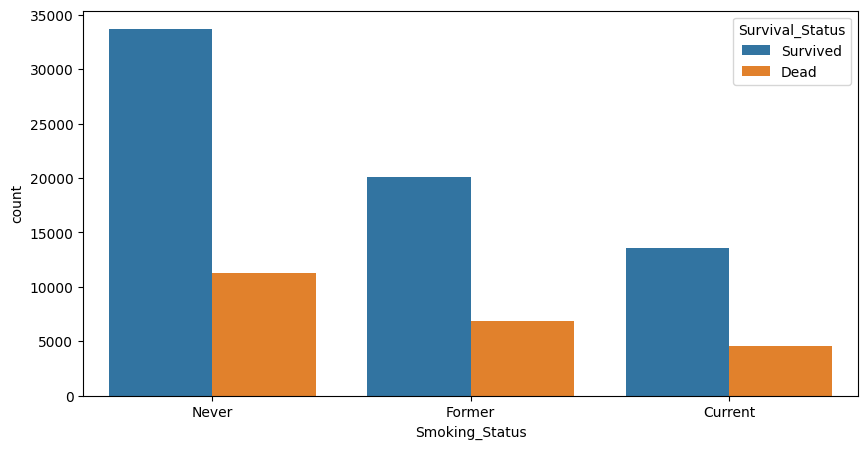

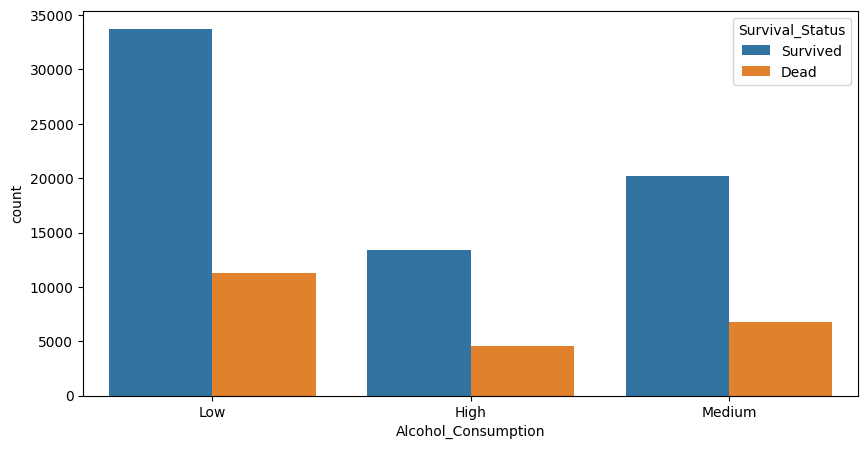

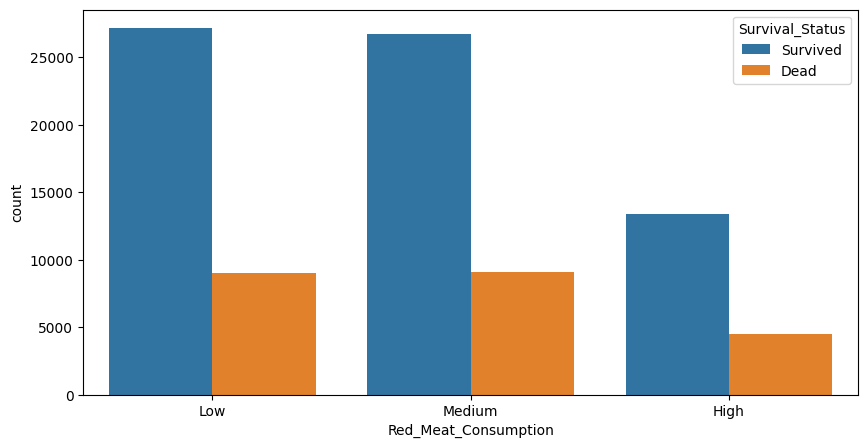

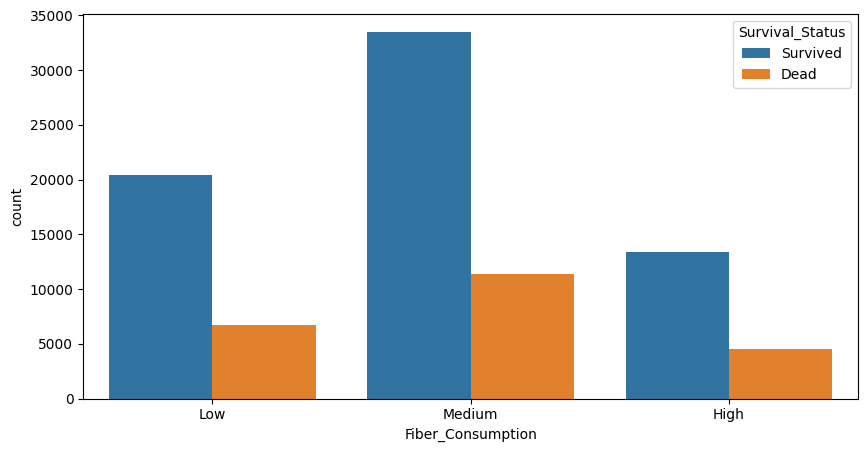

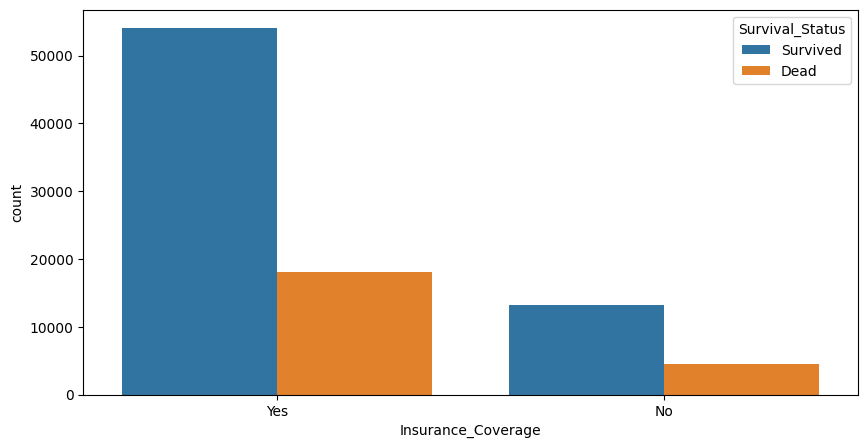

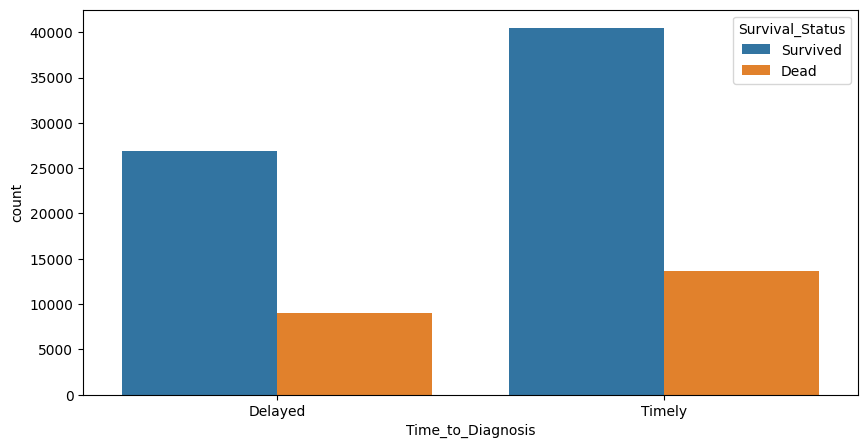

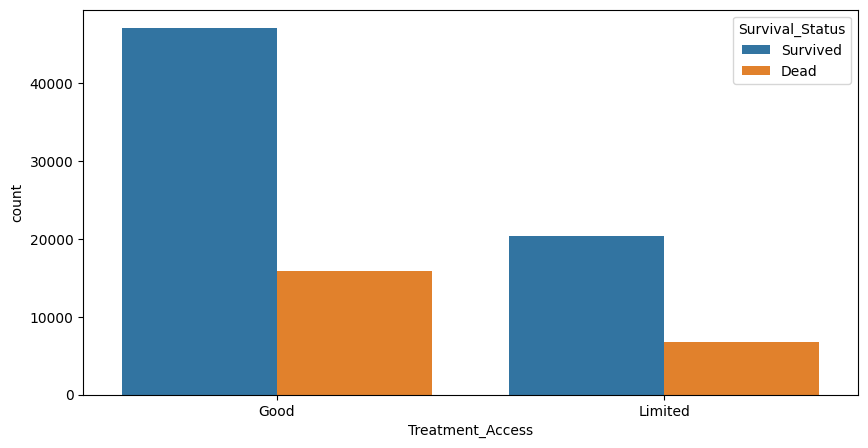

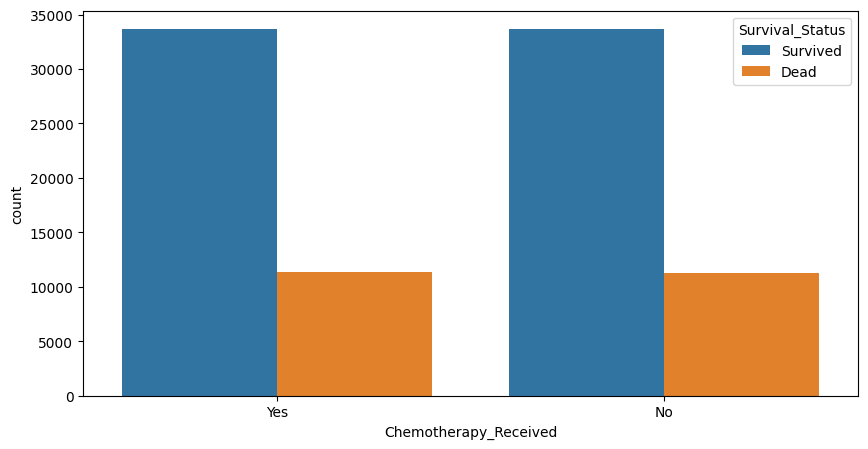

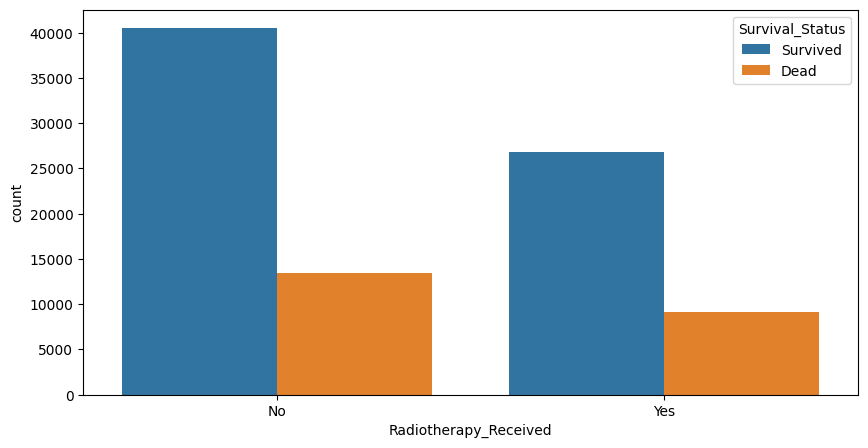

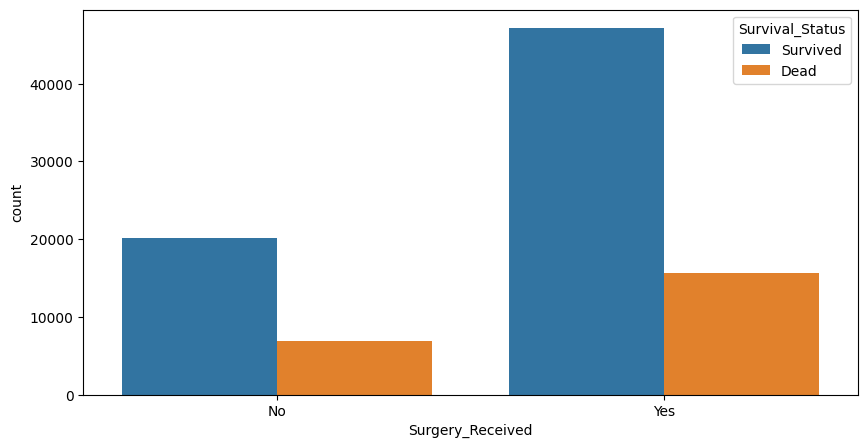

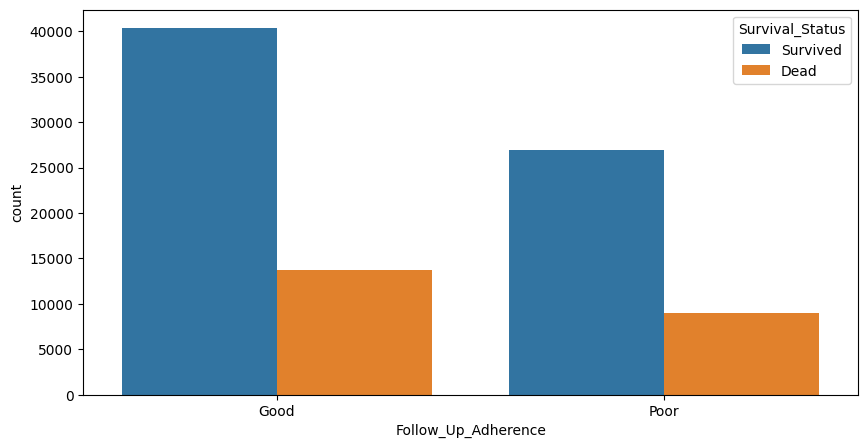

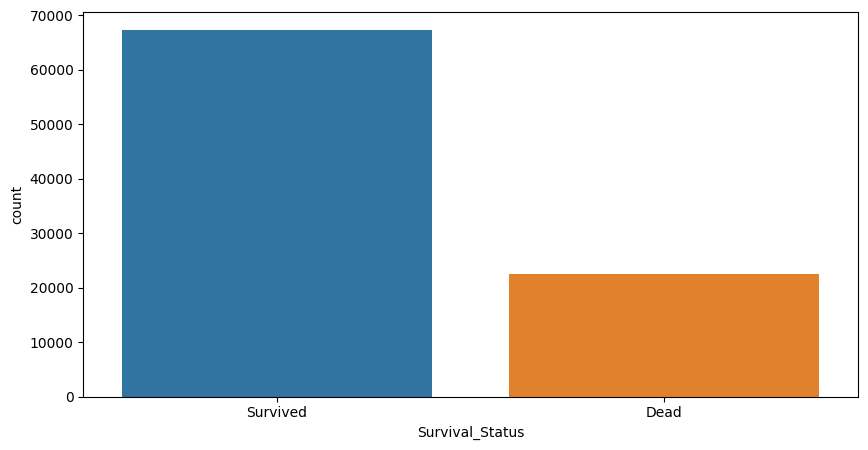

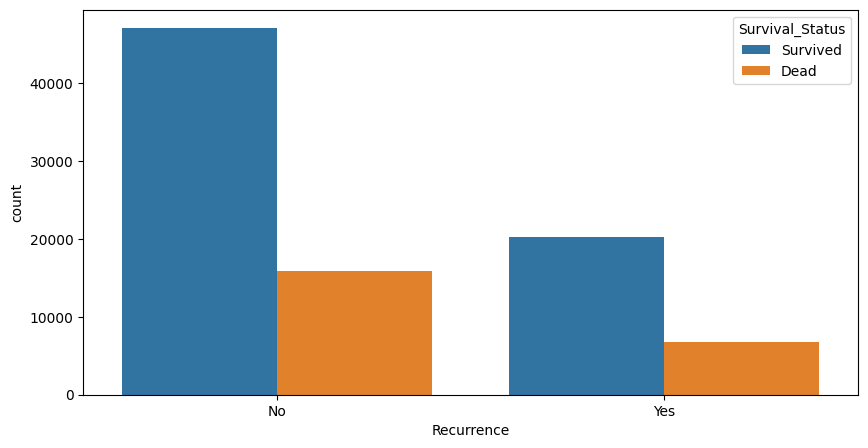

In [16]:
#visualization categorical column on target column
for col in cate_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x=df[col],hue=df['Survival_Status'])
  plt.show()

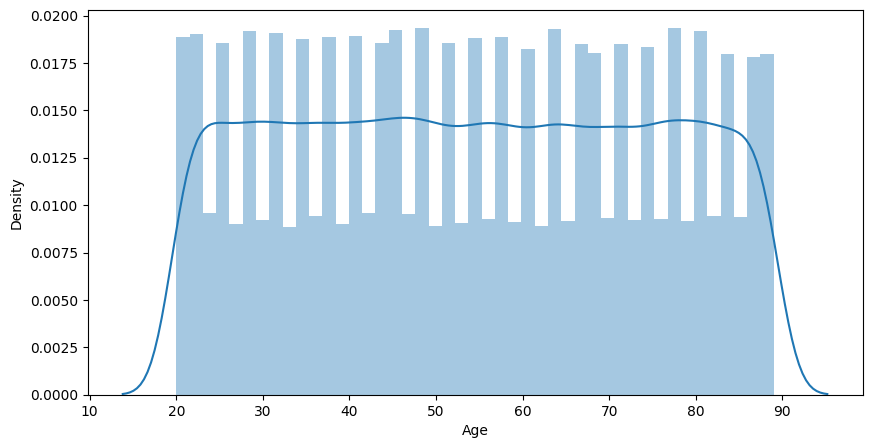

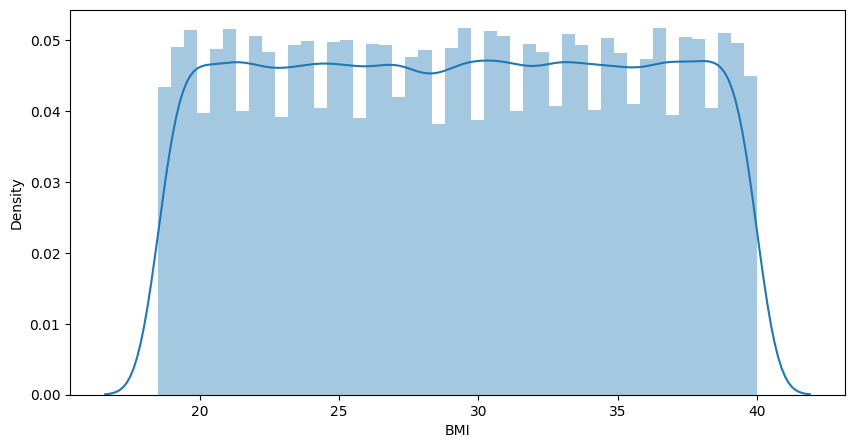

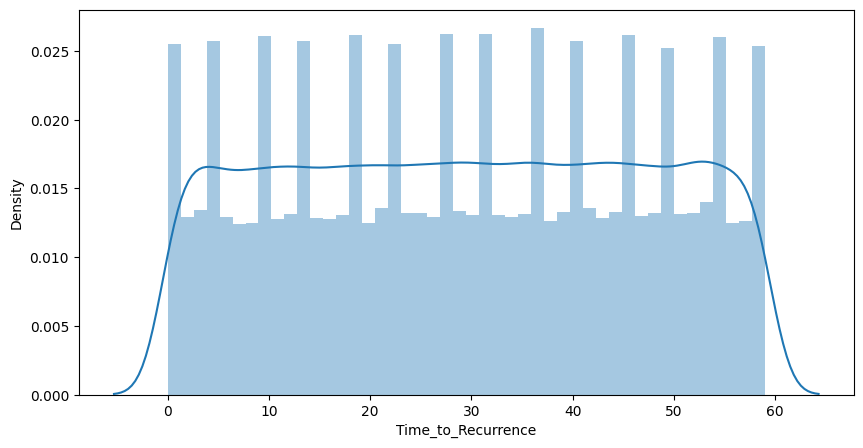

In [17]:
#numerical column distribution
for col in num_col:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.show()

#***Drop Uncessary column:-***

In [18]:
columns=['Race','Region','Urban_or_Rural','Gender','Recurrence',
       'Time_to_Recurrence']
df.drop(columns=columns,axis=1,inplace=True)

In [19]:
cat_col=df.select_dtypes(include='object').columns
cat_col

Index(['Socioeconomic_Status', 'Family_History', 'Previous_Cancer_History',
       'Stage_at_Diagnosis', 'Tumor_Aggressiveness', 'Colonoscopy_Access',
       'Screening_Regularity', 'Diet_Type', 'Physical_Activity_Level',
       'Smoking_Status', 'Alcohol_Consumption', 'Red_Meat_Consumption',
       'Fiber_Consumption', 'Insurance_Coverage', 'Time_to_Diagnosis',
       'Treatment_Access', 'Chemotherapy_Received', 'Radiotherapy_Received',
       'Surgery_Received', 'Follow_Up_Adherence', 'Survival_Status'],
      dtype='object')

In [20]:
#shape off dataset
df.shape

(89945, 23)

#***Encoding:-***

In [21]:
le=LabelEncoder()
encoder={}
for col in cat_col:
  df[col]=le.fit_transform(df[col])
  encoder[col]=le

In [22]:
encoder

{'Socioeconomic_Status': LabelEncoder(),
 'Family_History': LabelEncoder(),
 'Previous_Cancer_History': LabelEncoder(),
 'Stage_at_Diagnosis': LabelEncoder(),
 'Tumor_Aggressiveness': LabelEncoder(),
 'Colonoscopy_Access': LabelEncoder(),
 'Screening_Regularity': LabelEncoder(),
 'Diet_Type': LabelEncoder(),
 'Physical_Activity_Level': LabelEncoder(),
 'Smoking_Status': LabelEncoder(),
 'Alcohol_Consumption': LabelEncoder(),
 'Red_Meat_Consumption': LabelEncoder(),
 'Fiber_Consumption': LabelEncoder(),
 'Insurance_Coverage': LabelEncoder(),
 'Time_to_Diagnosis': LabelEncoder(),
 'Treatment_Access': LabelEncoder(),
 'Chemotherapy_Received': LabelEncoder(),
 'Radiotherapy_Received': LabelEncoder(),
 'Surgery_Received': LabelEncoder(),
 'Follow_Up_Adherence': LabelEncoder(),
 'Survival_Status': LabelEncoder()}

#***Correlation:-***

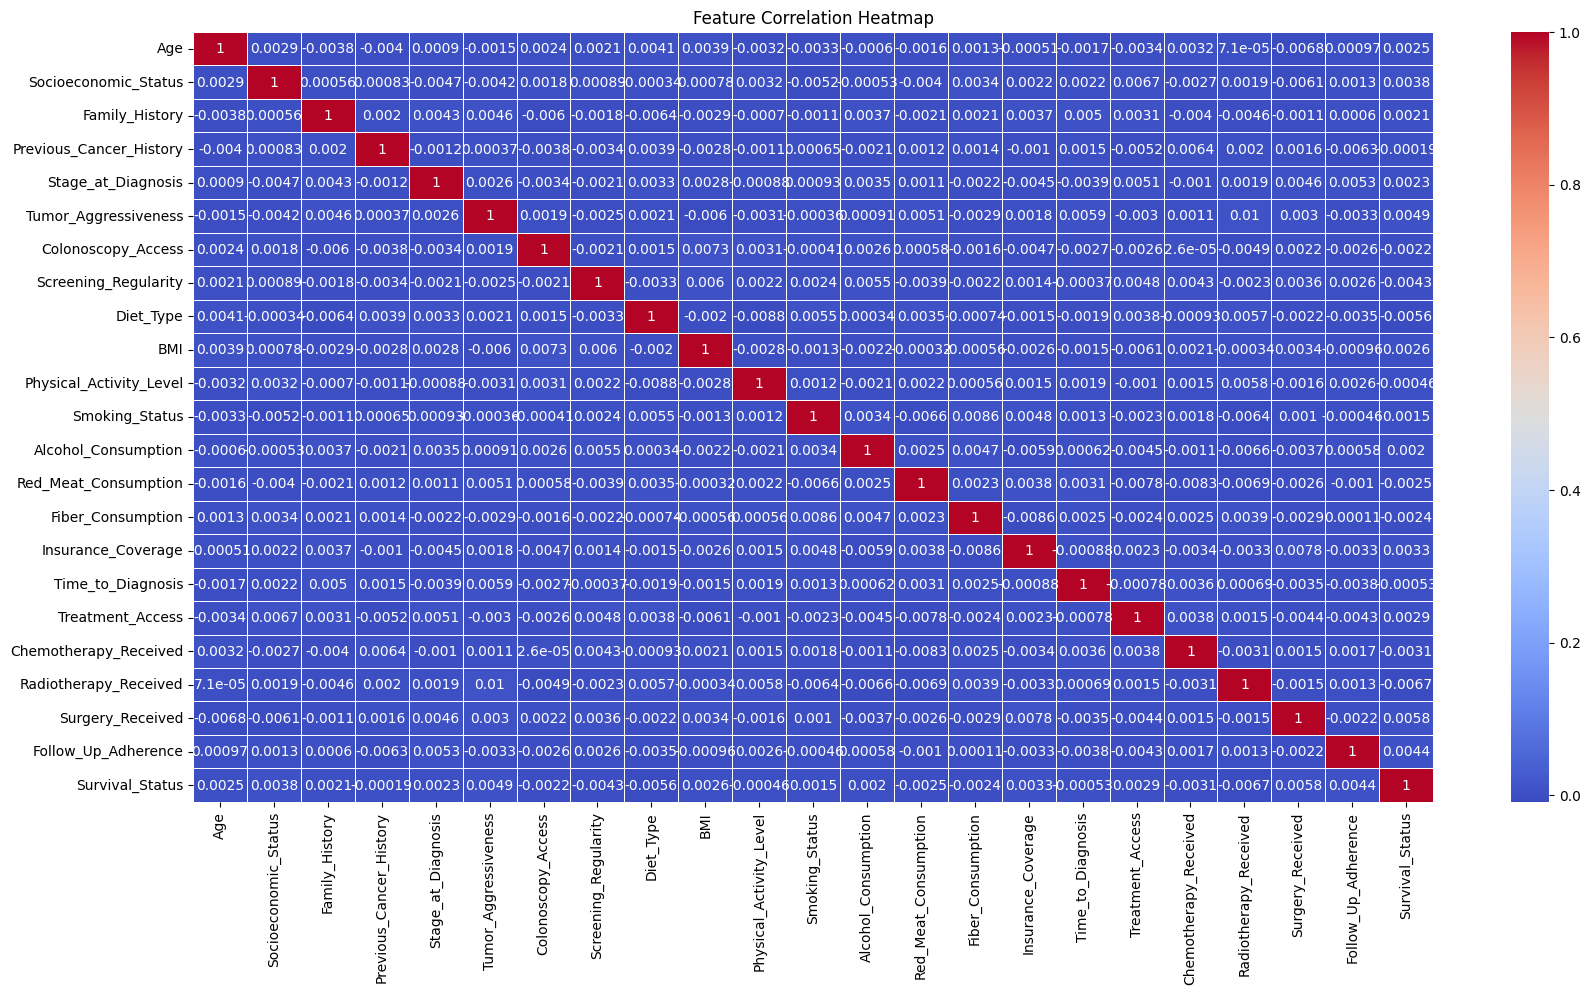

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",linewidths=0.7)
plt.title("Feature Correlation Heatmap")
plt.show()

#***Spliting in to X,y:-***

In [24]:
#spliting x,y
X=df.drop('Survival_Status',axis=1)
y=df['Survival_Status']

In [25]:
#check target column disttribution
y.value_counts()

,count
Survival_Status,
1,67341
0,22604


In [26]:
X.shape

(89945, 22)

#***Feature Selection:-***

In [27]:
# Apply Chi-Square test #Selecting top 15 features k=15
chi_selector = SelectKBest(score_func=chi2, k=15)
X_chi_selected = chi_selector.fit_transform(X, y)

# Get selected feature names
selected_chi_features = X.columns[chi_selector.get_support()]
print("Top Features (Chi-Square):", selected_chi_features)

Top Features (Chi-Square): Index(['Age', 'Socioeconomic_Status', 'Family_History', 'Stage_at_Diagnosis',
       'Tumor_Aggressiveness', 'Screening_Regularity', 'Diet_Type', 'BMI',
       'Red_Meat_Consumption', 'Fiber_Consumption', 'Treatment_Access',
       'Chemotherapy_Received', 'Radiotherapy_Received', 'Surgery_Received',
       'Follow_Up_Adherence'],
      dtype='object')


In [29]:
#drop the column not present in selected_chi_features
columns_to_drop = X.columns[~X.columns.isin(selected_chi_features)]
X.drop(columns=columns_to_drop, inplace=True)

In [30]:
X.columns

Index(['Age', 'Socioeconomic_Status', 'Family_History', 'Stage_at_Diagnosis',
       'Tumor_Aggressiveness', 'Screening_Regularity', 'Diet_Type', 'BMI',
       'Red_Meat_Consumption', 'Fiber_Consumption', 'Treatment_Access',
       'Chemotherapy_Received', 'Radiotherapy_Received', 'Surgery_Received',
       'Follow_Up_Adherence'],
      dtype='object')

#***split In to Train & Test:-***

In [31]:
#spliting dataset in to TRain and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
#shape of dataset
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((71956, 15), (17989, 15), (71956,), (17989,))

#***Choose Building Model:-***

In [35]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [36]:
# Train XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [37]:
# Evaluate Accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

In [38]:
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

# Compare models
if xgb_accuracy > rf_accuracy:
    print("🚀 XGBoost is the best model!")
else:
    print("🌳 Random Forest is the best model!")

Random Forest Accuracy: 0.7458
XGBoost Accuracy: 0.7511
🚀 XGBoost is the best model!


#***Save the Model & Encoder:-***

In [41]:
#save the encoder
joblib.dump(encoder,'encoder.pkl')

['encoder.pkl']

In [42]:
#save the model
joblib.dump(xgb_model,'colorectal_cancer_prediction.pkl')

['colorectal_cancer_prediction.pkl']